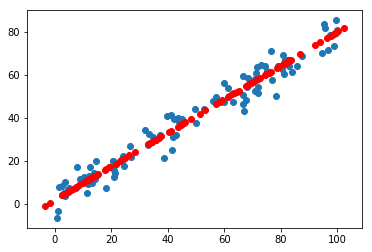

In [8]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)
plt.scatter(X[:,0], X[:,1])


from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)
plt.scatter(X_restore[:,0], X_restore[:,1],color='r')
plt.show()

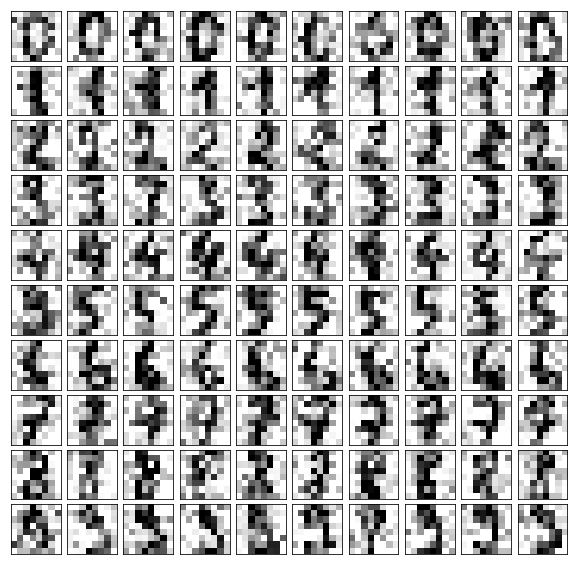

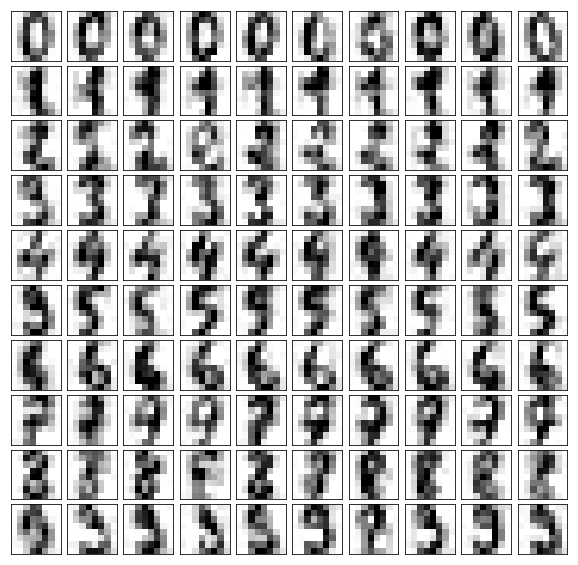

In [18]:
#手写识别的例子
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

#给数据添加噪音
noisy_digits = X + np.random.normal(0,4,size = X.shape)

example_digits = noisy_digits[y==0,:][:10]#取出标记y==0的x的前10个元素
for num in range(1,10):#把y==num的前10个元素添加进X_num,最后共100个数字
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits,X_num])
   
#定义绘制函数
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(example_digits)
plt.show()

#降噪
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
x=digits.data
y=digits.target
noisy_digits = x + np.random.normal(0,4,size = x.shape)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(noisy_digits,y,random_state=666)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
print(knn_clf.score(x_test,y_test))

#用PCA降噪
from sklearn.decomposition import PCA
pca=PCA(0.95)

#也可以输入pca=PCA(0.95)
#之后再pca.n_components_ 输出自动匹配的n_component值，此例里为28，准确度下降0.6%，但速度快了10倍
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)
x_train_restore = pca.inverse_transform(x_train_reduction)
x_test_restore = pca.inverse_transform(x_test_reduction)

knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(x_train_restore,y_train)
print(knn_clf2.score(x_test_restore,y_test))#精度降低但速度变快


